# Associazione tra Variabili

Utilizzeremo come esempio nuovamente il dataset Titanic:

In [1]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dato il dataset sopra, potremmo chiederci se delle variabili influenzano i valori di altre. Ad esempio, trovarsi in prima, seconda o terza classe (variabile `Pclass`) influenza in qualche modo la probabilità di sopravvivere (variabile `Survived`)?, o ancora, l'età (variabile `Age`) o il prezzo pagato (`Fare`) influenza in qualche modo la probabilità di salvarsi (`Survived`)?

In questa lezione, vedremo diversi modi per riassumere le distribuzioni di due variabili e verificare eventuali associazioni (o correlazioni) tra le variabili.

## Riassumere la Distribuzione di due Variabili Discrete

Se entrambe le variabili che stiamo studiando sono discrete, possiamo enumerare tutte le possibili combinazioni di valori e riassumerle in una tabella di contingenza che indica i valori di una variabile sulle righe e quelli dell'altra variabile sulle colonne. Ogni cella indicherà il numero di volte in cui osserviamo una data coppia di valori.

### Tabelle di Contingenza
Costruiamo la tabella di contingenza per le variabili `Sex` e `Pclass`. Per farlo utilizzeremo la funzione `crosstab` di Pandas:

In [2]:
pd.crosstab(titanic['Sex'], titanic['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


La tabella sopra indica ad esempio che $94$ passeggeri in classe $1$ erano di sesso femminile. Specificando `margins=True` possiamo ottenere le somme per righe e colonne, che indicheranno le frequenze assolute di ciascuna variabile:

In [3]:
pd.crosstab(titanic['Sex'], titanic['Pclass'],margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


### Distribuzioni di Frequenze Relative Congiunte

Possiamo ottenere la tabella delle frequenze relative congiunte passando `normalize=True` alla funzione crosstab:

In [4]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True)

Pclass,1,2,3
Sex,,,
female,0.105499,0.085297,0.161616
male,0.136925,0.121212,0.389450


### Distribuzioni di Frequenze Relative Marginali

Otteniamo i marginali passando `margins=True`:

In [5]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.105499,0.085297,0.161616,0.352413
male,0.136925,0.121212,0.389450,0.647587
All,0.242424,0.206510,0.551066,1.000000


Va notato che le frequenze relative marginali ottenute, sono identiche alle frequenze relative dei campioni univariati:

In [6]:
titanic['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Che sono esattamente i valori nell'ultima colonna della tabella precedente. Analogamente:

In [7]:
titanic['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Che sono i valori nell'ultima riga della tabella precedente.

### Distribuzioni di Frequenze Relative Condizionali

È possibile ottenere le frequenze condizionate relative normalizzando per la riga opportuna. Se voglio condizionare rispetto alla variabile X, normalizzerò per righe:

In [8]:
#normalize=0 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0)

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


Dalla tabella sopra, ad esempio, posso evincere:

* $f(Pclass=1|Sex=female) = 0.290363$
* $f(Pclass=2|Sex=female) = 0.242038$
* $f(Pclass=3|Sex=female) = 0.458599$

Queste sono le frequenze delle donne nelle tre classi. Analogamente, la seconda riga rappresenta le frequenze condizionate rispetto a `Sex=male`. Dalla tabella, notiamo che la distribuzione dei passeggeri cambia nelle tre classi. In particolare, tra gli uomini, la terza classe è più frequente che tra le donne. 

Possiamo ottenere la prospettiva complementare condizionando su classe invece:

In [9]:
#normalize=1 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1)

Pclass,1,2,3
Sex,,,
female,0.435185,0.413043,0.293279
male,0.564815,0.586957,0.706721


In questo caso, ogni colonna sarà una distribuzione di probabilità. Ad esempio:

* $P(Sex=female|Pclass=1) = 0.435185$
* $P(Sex=male|Pclass=1) = 0.564815$

Notiamo che le proporzione tra uomini e donne cambiano nelle tre classi e in particolare nella terza classe ci sono molti più uomini che donne.

### Rappresentazioni Grafiche
Possiamo facilmente ottenere rappresentazioni grafiche delle relazioni tra due variabili mediante grafici a barre, direttamente dalle tabelle di contingenza.

Possiamo confrontare le frequenze assolute di passeggeri e sessi nelle tre classi come segue:

<AxesSubplot:xlabel='Sex'>

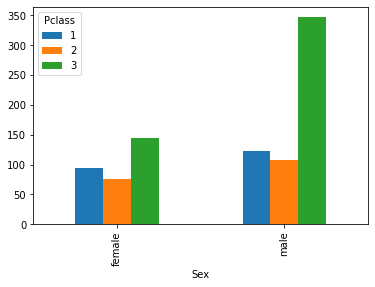

In [10]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar()

Da qui notiamo che molti passeggeri sono uomini e in terza classe. In questi casi, può essere a volte utile uno stacked plot:

<AxesSubplot:xlabel='Sex'>

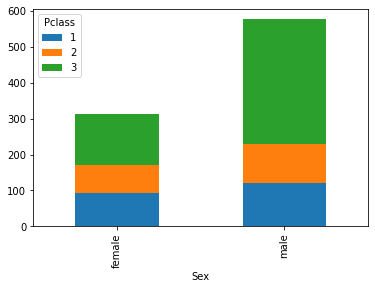

In [11]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar(stacked=True)

È spesso utile visualizzare le distribuzioni condizionate. Ad esempio, il grafico che segue ci permette di confrontare le distribuzioni di passeggeri nelle tre classi, suddividendo in due gruppi sulla base del sesso:

<AxesSubplot:xlabel='Sex'>

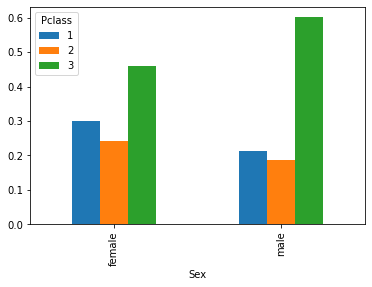

In [12]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0).plot.bar()

Possiamo ottenere il grafico delle frequenze condizionate rispetto alle classi per una vista complementare. In questo caso, per avere un grafico significativo, dobbiamo trasporre la tabella di contingenza con un `.T`:

<AxesSubplot:xlabel='Pclass'>

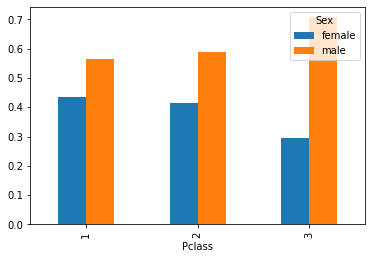

In [13]:
#normalize=1 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1).T.plot.bar()

### Misure di Associazione tra due Variabili Discrete

#### Statistica $\mathcal{X}^2$ di Pearson
Possiamo calcolare la statistica $\mathcal{X}^2$ di Pearson come segue:

In [14]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(titanic['Pclass'], titanic['Survived'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

La funzione `chi2_contingency` restituisce:
* Il valore della statistica;
* il p-value (lo vedremo meglio in seguito);
* i gradi di libertà della distirbuzione $\chi^2$ (vedremo meglio anche questo in seguito);
* Le occorrenze attese in caso di indipendenza.

Possiamo confrontare queste occorrenze con quelle reali:

In [15]:
contingency

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


#### Statistica $V$ di Cramer
È possibile calcolare la statistica V di Cramer come segue:

In [16]:
from scipy.stats.contingency import association

association(pd.crosstab(titanic['Pclass'], titanic['Survived']))

0.33981738800531175

#### Rischio Relativo e Odds Ratio

Consideriamo questa matrice di contingenza:

In [2]:
import pandas as pd
contingency = pd.DataFrame({
    "Exposed": [20, 380],
    "Non Exposed": [6,594]
}, index=["Diseased", "Healthy"])
contingency

,Exposed,Non Exposed
Diseased,20,6
Healthy,380,594


Possiamo calcolare il rischio relativo come segue:

In [3]:
from scipy.stats.contingency import relative_risk
relative_risk(contingency['Exposed']['Diseased'],contingency['Exposed'].sum(),contingency['Non Exposed']['Diseased'], contingency['Non Exposed'].sum())

RelativeRiskResult(relative_risk=5.0, exposed_cases=20, exposed_total=400, control_cases=6, control_total=600)

La funzione richiede che vengano passati i vari valori necessari piuttoto che la matrice di contingenza per evitare ambiguità.

L'odds ratio si calcola così:

In [18]:
from scipy.stats.contingency import odds_ratio
odds_ratio(contingency)

OddsRatioResult(statistic=5.202179487843056)

## Associazioni tra Variabili Continue

Per studiare le associazioni tra variabili continue, considereremo il dataset delle iris di fisher come dataset di esempio. Carichiamo il dataset mediante la libreria `seaborn` e visualizziamone informazioni e prime righe:

In [19]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il dataset contiene $150$ osservazioni riportanti le misure di 4 grandezze (lunghezza e larghezza di sepalo e petalo) per $150$ esemplari di iris appartenenti a tre specie diverse: Iris setosa, Iris virginica e Iris versicolor. 

Tutte le variabili sono numeriche, eccetto `species` che è categorica. Visualizziamone i valori univoci:

In [20]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Esploriamo i dati calcolando i principali indicatori statistici mediante `describe`:

In [21]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> **🙋‍♂️ Domanda 1**
>
> La variabile `species` non è stata inclusa nel sommario. Perché?

Confrontiamo le diverse variabili mediante boxplot:

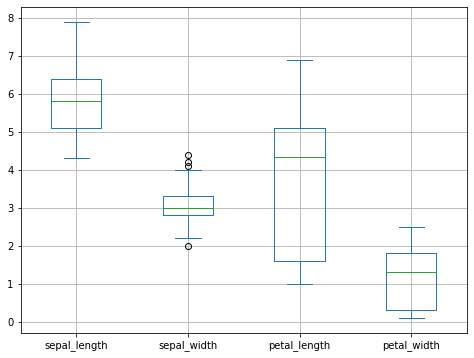

In [23]:
from matplotlib import pyplot as plt
iris.plot.box(figsize=(8,6))
plt.grid()
plt.show()

## Scatter Plot

Possiamo mostrare uno scatterplot in seaborn come segue:

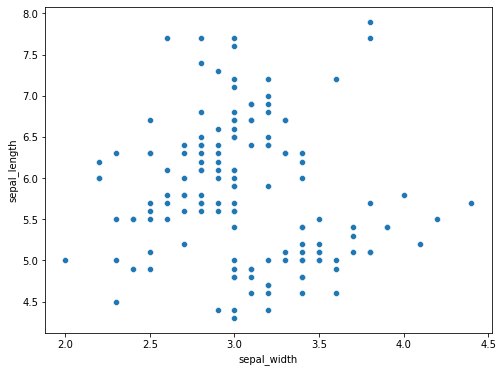

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['sepal_width'], y=iris['sepal_length'])
plt.show()

In alternativa, possiamo usare Pandas:

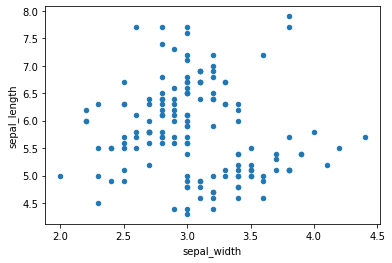

In [30]:
iris.plot.scatter(x='sepal_width',y='sepal_length')
plt.show()

Con seabord, possiamo facilmente colorare i punti in maniera diversa a seconda dell'appartenenza alle diverse classi di iris utilizzando il parametro `hue`:

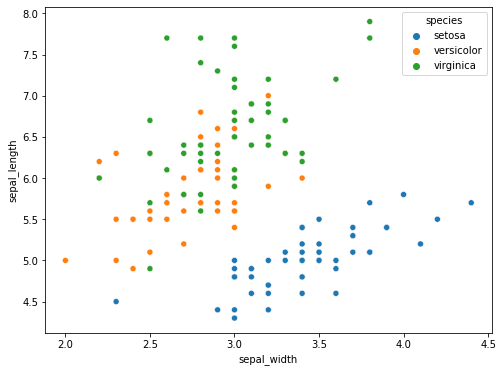

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['sepal_width'], y=iris['sepal_length'], hue=iris['species'])
plt.show()

> **🙋‍♂️ Domanda 2**
> 
> Cosa apprendiamo dal plot? La coppia di variabili considerata costituisce un fattore discriminante per l'appartenenza alle diverse classi?

Lo scatterplot può essere effettuato con diverse coppie di variabili. Consideriamo la coppia (`sepal_length`, `petal_length`):

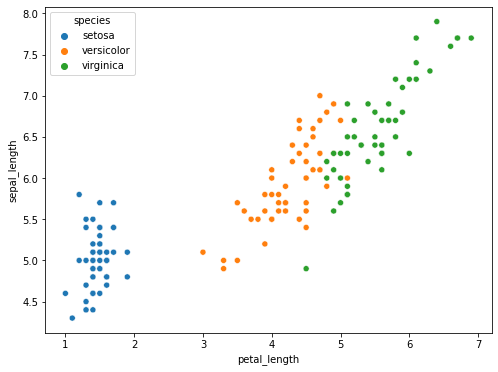

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['petal_length'], y=iris['sepal_length'], hue=iris['species'])
plt.show()

> **🙋‍♂️ Domanda 3**
> 
> Si confronti l'ultimo scatterplot visualizzato con lo scatterplot visto in precedenza. La nuova coppia di variabili costituisce un fattore discriminante per l'appartenenza alle diverse classi?

Come possiamo notare dai due plot, ogni coppia di variabili ci permette di vedere "una parte" delle possibili interazioni tra le diverse variabili. Per avere un quadro più completo, in pratica si visualizzano gli scatter plot di tutte le coppie possibili. Questo plot prende il nome di scatter matrix. Possiamo ottenere una scatter matrix con `seaborn` come segue:

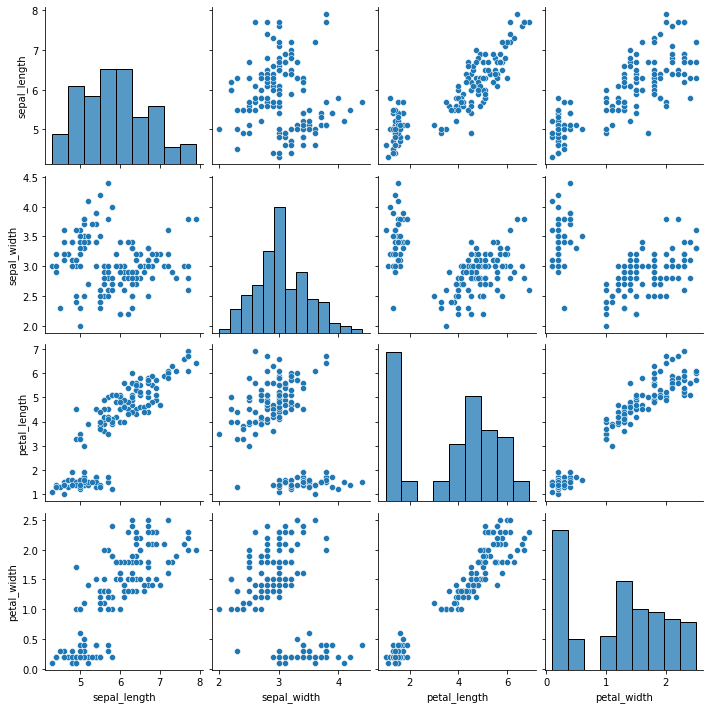

In [33]:
sns.pairplot(iris)
plt.show()

> **🙋‍♂️ Domanda 4**
> 
> Perché sulla diagonale principale vengono mostrati degli istogrammi al posto di scatter plot? Si mostrino gli scatterplot corrispondenti alle coppie di variabili sulla diagonale principale.

Possiamo evidenziare i punti per classe specificando una variabile sulla base della quale colorare i punti:

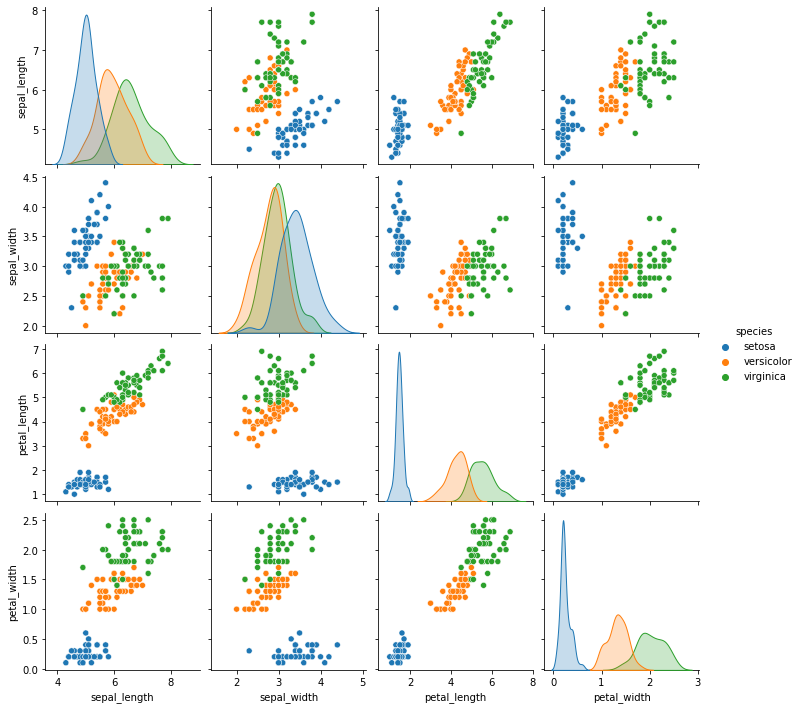

In [34]:
sns.pairplot(iris, hue='species')
plt.show()

> **🙋‍♂️ Domanda 5**
> 
> Esiste una coppia di variabili che individua uno spazio nel quale le osservazioni appartenenti alle diverse classi sono maggiormente distinte? Esiste una unica variabile che presenta distribuzioni particolarmente diverse a seconda dell'appartenenza alle tre classi?

## Medie e Covarianze

Nel caso **multivariato**, la **media** viene calcolata in maniera del tutto analoga al caso **univariato** come **media di vettori**. Possiamo banalmente calcolare la media dei nostri dati multivariati mediante il metodo `mean`:

In [35]:
print(iris.mean()) 

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_34355/769219605.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(iris.mean())


Il risultato sarà un vettore (una serie di Pandas) che individua un punto nello spazio a quattro dimensioni che rappresenta la media delle osservazioni. Vediamo un semplice esempio a due dimensioni, considerando solo alcune variabili:

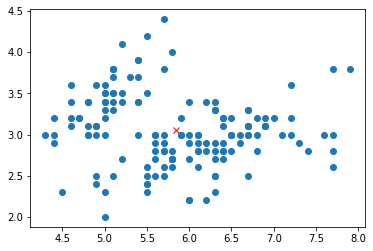

In [36]:
iris2d = iris[['sepal_length','sepal_width']]
mean_point = iris2d.mean()
plt.scatter(iris2d['sepal_length'],iris2d['sepal_width'])
plt.plot(mean_point.iloc[0], mean_point.iloc[1],'rx')
plt.show()

La croce rossa rappresenta il punto medio del dataset bidimensionale considerato.

Posso ottenre la matrice di covarianza mediante il metodo `cov`:

In [20]:
iris.drop("species", axis=1).cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


> **🙋‍♂️ Domanda 6**
> 
> A cosa serve il codice `drop("species", axis=1)` inserito sopra?
> 
> Che cosa rappresentano i valori sulla diagonale principale?

> **🙋‍♂️ Domanda 7**
> 
> Ci sono coppie di variabili che presentano covarianze fortemente positive? Si confrontino i valori della matrice di covarianza con i relativi plot dello scatterplot. I due indicatori ci dicono la stessa cosa?

## Indici di Correlazione

Posso calcolare la matrice di correlazione con l'indice di correlazione di Pearson mediante il metodo `corr`:

In [37]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


> **🙋‍♂️ Domanda 8**
> 
> Ci sono coppie di variabili che presentano correlazioni fortemente positive? Si confrontino i valori della matrice di covarianza con i relativi plot dello scatterplot. I due indicatori ci dicono la stessa cosa?

È possibile specificare l'utilizzo di un indice di correlazione diverso passando un parametro al metodo `corr`:

In [38]:
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


In [39]:
iris.corr(method='kendall')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.076997,0.718516,0.655309
sepal_width,-0.076997,1.000000,-0.185994,-0.157126
petal_length,0.718516,-0.185994,1.000000,0.806891
petal_width,0.655309,-0.157126,0.806891,1.000000


### Correlation Plot
Possiamo facilmente ottenere un correlation plot in `Seaborn` come segue:

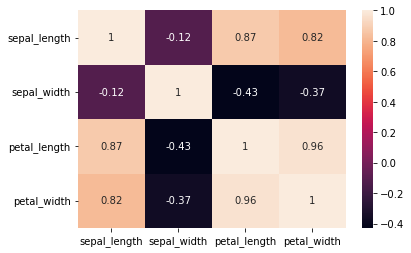

In [41]:
sns.heatmap(iris.corr(), annot=True) #annot=True serve a stampare i valori di correlazione
plt.show()

## Esercizi

> 🧑‍💻 Esercizio 1
> 
> Considerando il dataset Titanic, si calcolino per ogni variabile la numerosità, la media, la deviazione standard, il minimo, il massimo, il valore mediano, il primo e il terzo quartile. Dopo aver calcolato i valori richiesti individualmente, si utilizzi il metodo `describe` per ottenere tali valori. Qual è la variabile più dispersa?

> 🧑‍💻 Esercizio 2
> 
> Considerando il dataset Titanic, per ognuna delle tre classi, si calcolino medie e varianze delle età dei passeggeri. In quale classe le età sono meno disperse? Quale classe contiene i soggetti più giovani? Si completi l'analisi con dei grafici a barre.

> 🧑‍💻 Esercizio 3
> 
> Si aggiunga al dataset Titanic una nuova colonna "Old" che assume valore pari a 1 per le osservazioni che presentano età superiore al valore medio e 0 altrimenti. Si calcoli dunque una crosstab che calcoli il numero di soggetti "anziani" (soggetti per i quali old è pari a 1) rispetto alle variabili Pclass e Sex. Si mostri un barplot a partire dalla tabella. In quale classe gli uomini tendono ad essere molto più anziani delle donne?

> 🧑‍💻 Esercizio 4
> 
> Si carichi il dataset mpg mediante la libreria seaborn (usare l'istruzione `t=sns.load_dataset('mpg')`). Si visualizzi la scatter matrix differenziando i colori dei punti a seconda dei valori della variabile `origin`. Chi produce le macchine più pesanti? Esistono coppie di variabili che costituiscono un fattore decisivo per distinguere una delle origini dalle altre?

> 🧑‍💻 Esercizio 5
> 
> Considerando il dataset `mpg`, si scelga un gruppo di variabili rispetto alle quali ottenere un diagramma a coordinate parallele. Che cosa possiamo inferire dal diagramma?